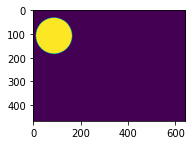

In [4]:
#-------- R1 --------

%matplotlib inline 
import cv2
from matplotlib import pyplot as plt
import numpy as np


img_rgb = cv2.imread('/content/circulo.png')

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
imagem_hsv2 = img_hsv.copy()


image_lower_hsv = np.array([80,150,215])
image_upper_hsv = np.array([90,175,232])

mask_hsv = cv2.inRange(imagem_hsv2, image_lower_hsv, image_upper_hsv)

plt.subplot(1,2,1)
plt.imshow(mask_hsv)
#plt.subplot(1,2,2)
#plt.imshow(mask_hsv, cmap="Greys_r", vmin = 0, vmax=255)
plt.show()


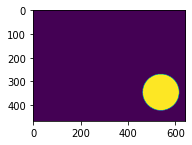

In [5]:
image_lower_hsv = np.array([0,100,50])
image_upper_hsv = np.array([10,255,255])
imagem_hsv3 = img_hsv.copy()
mask_hsv2 = cv2.inRange(imagem_hsv3, image_lower_hsv, image_upper_hsv)

plt.subplot(1,2,1)
plt.imshow(mask_hsv2)
#plt.subplot(1,2,2)
#plt.imshow(mask_hsv, cmap="Greys_r", vmin = 0, vmax=255)
plt.show()


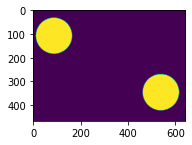

In [6]:
bitwiseOr = cv2.bitwise_or(mask_hsv, mask_hsv2)
plt.subplot(1,2,1)
plt.imshow(bitwiseOr)
#plt.subplot(1,2,2)
#plt.imshow(mask_hsv, cmap="Greys_r", vmin = 0, vmax=255)
plt.show()


In [7]:
# realizando o contorno da imagem

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos2, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

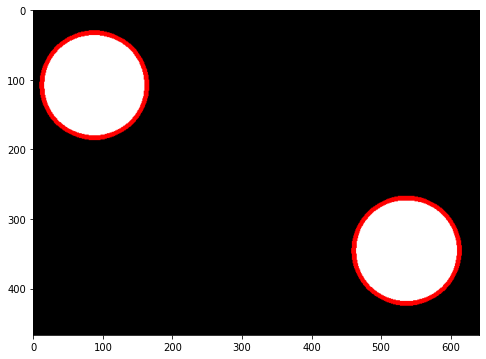

In [8]:
# para desenhar o contorno primeiro faz uma copia da imagem 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
mask_rgb2 = cv2.cvtColor(mask_hsv2, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
contornos_img2 = mask_rgb2.copy()

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 6);
cv2.drawContours(contornos_img2, contornos2, -1, [255, 0, 0], 6);


plt.figure(figsize=(8,6))
bitwiseOr = cv2.bitwise_or(contornos_img, contornos_img2)
plt.imshow(bitwiseOr);

In [9]:
print("Quantidade de contornos encontrado: ", len(contornos + contornos2))

Quantidade de contornos encontrado:  2


In [98]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cnt = contornos[0]

M = cv2.moments(cnt) #2.LINE_AA)
print( M )


{'m00': 17859.0, 'm10': 1564749.5, 'm01': 1919573.5, 'm20': 162485379.3333333, 'm11': 168208880.75, 'm02': 231701779.3333333, 'm30': 18685818418.75, 'm21': 17468831091.333332, 'm12': 20304973379.5, 'm03': 30359376007.75, 'mu20': 25386941.69683349, 'mu11': 21878.43529871106, 'mu02': 25376541.531538695, 'mu30': 711485.4142951965, 'mu21': 266398.62359571457, 'mu12': -712151.0552067757, 'mu03': -267242.28060150146, 'nu20': 0.07959689214678331, 'nu11': 6.859650428192746e-05, 'nu02': 0.07956428401126371, 'nu30': 1.6692568156051952e-05, 'nu21': 6.250131192717435e-06, 'nu12': -1.6708185139985486e-05, 'nu03': -6.2699247145331695e-06}


In [127]:
# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = int(M['m11']/M['m01'])
cy2= int(M['m02']/M['m01'])

print("centro de massa nas posições:", cx, cy, " e ", cx2, cy2)

centro de massa nas posições: 87 107  e  87 120


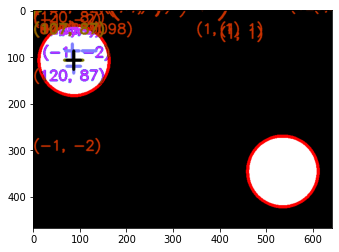

In [129]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 15
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img2,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img2,(cx2,cy2 - size),(cx2, cy2 + size),color,5)


# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

text2 = cy2 , cx2
origem2 = (0,-50)


cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img2, str(text2), origem2, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornos_img + contornos_img2);

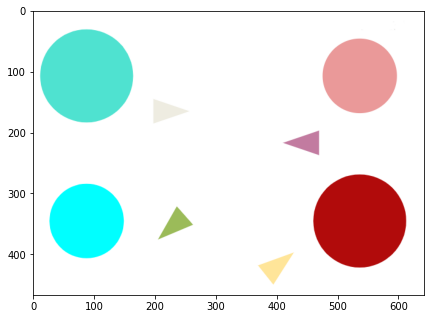

In [83]:
#-------- R2 --------

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('/content/circulo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (7,7))
plt.imshow(img); plt.show()

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 100, np.array([]), 180, 5)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb); plt.show()